### Fundamentals of Data Analysis (FoDA) - Project 2020

                                                                          Author: Sheldon D'Souza, email: G00387857@gmit.ie

***

##### Objective

The objective of the project is to perform and explain simple linear regression using Python on the powerproduction dataset given. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

The git repository will contain, at a minimum, the following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance the submission, consider comparing simple linear regression to other types of regression on this data set.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('powerproduction.csv', sep=',')

In [6]:
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [55]:
df.tail(10)

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [7]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [12]:
df.loc[df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


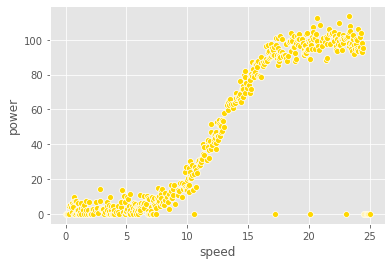

In [98]:
# Plot the data points as a scatterplot to visualise the data

sns.scatterplot(data = df, x="speed", y="power", color='gold')
plt.style.use('ggplot')
plt.show()

In [127]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
from sklearn.linear_model import LinearRegression
pp_model = LinearRegression()
pp_model.fit(X_train, y_train)

LinearRegression()

In [124]:
print(regressor.intercept_)

-13.603433993820211


In [125]:
print(regressor.coef_)

[4.89542079]


In [126]:
y_pred = regressor.predict(X_test)

In [120]:
act_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
act_vs_pred

,Actual,Predicted
0,7.060,10.408605
1,51.149,48.632051
2,71.763,57.326318
3,99.357,96.161691
4,113.556,100.327694
...,...,...
95,96.058,77.911562
96,3.578,1.097515
97,93.931,95.304992
98,0.000,1.709442


### Reference:

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/